<a href="https://colab.research.google.com/github/zeruel91/DataAnalysis/blob/main/%EC%96%BC%EA%B5%B4%EC%9D%B8%EC%8B%9D_%EC%9C%A0%EB%AA%85%EC%9D%B8_%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#코랩에서 필로우 버전 충돌 해결 방법
!pip3 uninstall Pillow -y 
!pip3 install Pillow   # 사진처리.
!pip install requests  # 인터넷 요청 처리


Uninstalling Pillow-4.1.1:
  Successfully uninstalled Pillow-4.1.1
  Using cached https://files.pythonhosted.org/packages/5f/19/d4c25111d36163698396f93c363114cf1cddbacb24744f6612f25b6aa3d0/Pillow-8.0.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests

In [36]:
!pip install pillow==4.1.1 #pillow 구버전에서 jpg못읽는 버그 해결.

  Using cached https://files.pythonhosted.org/packages/36/e5/88b3d60924a3f8476fa74ec086f5fbaba56dd6cee0d82845f883b6b6dd18/Pillow-4.1.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: scikit-image 0.16.2 has requirement pillow>=4.3.0, but you'll have pillow 4.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 8.0.1
    Uninstalling Pillow-8.0.1:
      Successfully uninstalled Pillow-8.0.1


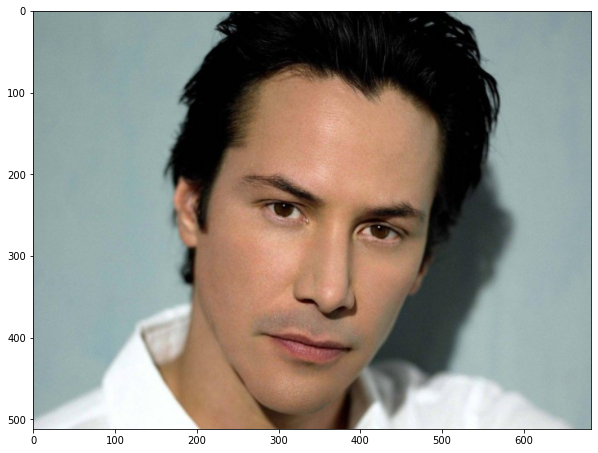

In [37]:
img = mpimg.imread('kianu.jpg')
plt.figure(figsize = (10,8))
plt.imshow(img)

In [38]:
import requests #인터넷으로 연결..
client_id = "DE0tZzgFT4Zi4tDYbRGc"
client_secret = "mMf9G9VoDg"

# url = "https://openapi.naver.com/v1/vision/celebrity"
url = "https://openapi.naver.com/v1/vision/face"

files = {'image':open('kianu.jpg','rb')}

headers = {"X-Naver-Client-Id":client_id,"X-Naver-Client-Secret":client_secret}

response = requests.post(url,files = files, headers = headers)


In [39]:
import json
parsed = json.loads(response.text)
print(parsed)
print(json.dumps(parsed,indent = 4,sort_keys = False,ensure_ascii = False))
#ensure_ascii = False 아즈키가 아닌 실제 글자로 나옴.
#json.dumps 를 이용하면 들여쓰기등, 보기좋게 반환

{'info': {'size': {'width': 683, 'height': 512}, 'faceCount': 1}, 'faces': [{'roi': {'x': 228, 'y': 192, 'width': 261, 'height': 261}, 'landmark': {'leftEye': {'x': 309, 'y': 237}, 'rightEye': {'x': 428, 'y': 261}, 'nose': {'x': 363, 'y': 346}, 'leftMouth': {'x': 279, 'y': 393}, 'rightMouth': {'x': 394, 'y': 409}}, 'gender': {'value': 'male', 'confidence': 0.999997}, 'age': {'value': '33~37', 'confidence': 0.495344}, 'emotion': {'value': 'neutral', 'confidence': 0.992625}, 'pose': {'value': 'frontal_face', 'confidence': 0.996776}}]}
{
    "info": {
        "size": {
            "width": 683,
            "height": 512
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 228,
                "y": 192,
                "width": 261,
                "height": 261
            },
            "landmark": {
                "leftEye": {
                    "x": 309,
                    "y": 237
                },
                "rightEye": 

In [40]:
result = json.loads (response.text)
result['faces'][0]

{'age': {'confidence': 0.495344, 'value': '33~37'},
 'emotion': {'confidence': 0.992625, 'value': 'neutral'},
 'gender': {'confidence': 0.999997, 'value': 'male'},
 'landmark': {'leftEye': {'x': 309, 'y': 237},
  'leftMouth': {'x': 279, 'y': 393},
  'nose': {'x': 363, 'y': 346},
  'rightEye': {'x': 428, 'y': 261},
  'rightMouth': {'x': 394, 'y': 409}},
 'pose': {'confidence': 0.996776, 'value': 'frontal_face'},
 'roi': {'height': 261, 'width': 261, 'x': 228, 'y': 192}}

In [41]:
result['faces'][0]['gender']

{'confidence': 0.999997, 'value': 'male'}

In [42]:
result['faces'][0]['age']

{'confidence': 0.495344, 'value': '33~37'}

In [49]:
import matplotlib.patches as patches
img = mpimg.imread('kianu.jpg')
fig,ax = plt.subplots(figsize = (14,40))
for each in result['faces']:
  x,y,w,h = each['roi'].values()
  gender,gen_conf = each['gender'].values()
  emotion,emotion_conf = each['emotion'].values()
  age, age_conf = each['age'].values()

rect_face = patches.Rectangle((x,y),w,h,linewidth = 3, edgecolor = 'r', facecolor = 'none')

ant_letter = gender + ', ' + emotion + ', ' + age
plt.text(x,y+h+40,ant_letter,size = 20, color = 'b')
ax.add_patch(rect_face) #그림 사이즈가 너무 커서 안뜨는 오류 발생.


ValueError: ignored

<Figure size 1008x2880 with 1 Axes>